In [ ]:
import pyscreenshot as ImageGrab
import time as time
import tkinter as tk
from PIL import ImageGrab
import os

images_folder = "captured_images/3/"
if not os.path.exists(images_folder):
    os.makedirs(images_folder)

root = tk.Tk()
root.title("Draw and Capture")


canvas = tk.Canvas(root, width=400, height=400, bg='white')
canvas.pack()

last_x, last_y = None, None

def start_draw(event):
    global last_x, last_y
    last_x, last_y = event.x, event.y

def draw(event):
    global last_x, last_y
    canvas.create_line((last_x, last_y, event.x, event.y), fill='black', width=5)
    last_x, last_y = event.x, event.y

def clear_canvas():
    canvas.delete("all")

canvas.bind("<Button-1>", start_draw)
canvas.bind("<B1-Motion>", draw)

clear_button = tk.Button(root, text="Clear", command=clear_canvas)
clear_button.pack()

capture_count =28
def capture_images():
    global capture_count
    if capture_count < 100:
        x = root.winfo_rootx() + canvas.winfo_x()
        y = root.winfo_rooty() + canvas.winfo_y()
        x1 = x + canvas.winfo_width()
        y1 = y + canvas.winfo_height()
        im = ImageGrab.grab(bbox=(x, y, x1, y1))
        im.save(f"{images_folder}image_{capture_count}.png")
        print(f"We successfully saved: {capture_count}")
        capture_count=capture_count+1
        root.after(8000, capture_images)

root.after(8000, capture_images)
root.mainloop()

We successfully saved: 28
We successfully saved: 29
We successfully saved: 30
We successfully saved: 31
We successfully saved: 32
We successfully saved: 33
We successfully saved: 34
We successfully saved: 35
We successfully saved: 36
We successfully saved: 37
We successfully saved: 38
We successfully saved: 39
We successfully saved: 40
We successfully saved: 41
We successfully saved: 42
We successfully saved: 43
We successfully saved: 44
We successfully saved: 45
We successfully saved: 46
We successfully saved: 47
We successfully saved: 48
We successfully saved: 49
We successfully saved: 50
We successfully saved: 51
We successfully saved: 52
We successfully saved: 53
We successfully saved: 54
We successfully saved: 55
We successfully saved: 56
We successfully saved: 57
We successfully saved: 58
We successfully saved: 59
We successfully saved: 60
We successfully saved: 61
We successfully saved: 62
We successfully saved: 63
We successfully saved: 64


KeyboardInterrupt: 

In [ ]:
import os
from PIL import Image

input_folder = 'captured_images/33/'
output_folder = 'captured_images/33/'

os.makedirs(output_folder, exist_ok=True)

target_width = 336
target_height = 279

def crop_to_target_size(image, target_width, target_height):
    width, height = image.size
    
    if width >= target_width and height >= target_height:
        left = (width - target_width) // 2
        upper = (height - target_height) // 2
        right = left + target_width
        lower = upper + target_height

        return image.crop((left, upper, right, lower))
    else:
        print(f"Image {image.filename} is too small for the target size.")
        return image

for filename in os.listdir(input_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(input_folder, filename)

        image = Image.open(image_path)

        cropped_image = crop_to_target_size(image, target_width, target_height)

        output_path = os.path.join(output_folder, filename)
        cropped_image.save(output_path)

        print(f"Cropped and saved {filename} to {output_folder}")

print("Cropping completed for all images.")


Cropping completed for all images.


In [ ]:
import cv2
import csv
import glob

header = ["label"] + [f"pixel{i}" for i in range(28 * 28)]

with open('dataset.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    
    for label in range(10):
        dir_list = glob.glob(f"captured_images/{label}/*.png") 
        
        for img_path in dir_list:
            try:
                im = cv2.imread(img_path)

                if im is None:
                    print(f"Skipping {img_path}: Unable to read the image.")
                    continue

                im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
                
                im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)
                
                roi = cv2.resize(im_gray, (28, 28), interpolation=cv2.INTER_AREA)
                _, roi = cv2.threshold(roi, 100, 255, cv2.THRESH_BINARY)

                data = [label] + [1 if pixel > 0 else 0 for pixel in roi.flatten()]

                writer.writerow(data)
            
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")

print("Dataset creation complete!")


Dataset creation complete!


In [ ]:
import pandas as pd 
from sklearn.utils import shuffle 
 
data = pd.read_csv('dataset.csv')
data = shuffle(data)
print(data)

      label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
449       4       0       0       0       0       0       0       0       0   
172       1       0       0       0       0       0       0       0       0   
534       5       0       0       0       0       0       0       0       0   
404       3       0       0       0       0       0       0       0       0   
577       5       0       0       0       0       0       0       0       0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
265       2       0       0       0       0       0       0       0       0   
1005      9       0       0       0       0       0       0       0       0   
478       4       0       0       0       0       0       0       0       0   
646       6       0       0       0       0       0       0       0       0   
304       3       0       0       0       0       0       0       0       0   

      pixel8  ...  pixel774  pixel775  pixel776  pi

In [10]:
X = data.drop(["label"],axis=1)
Y= data["label"]

3


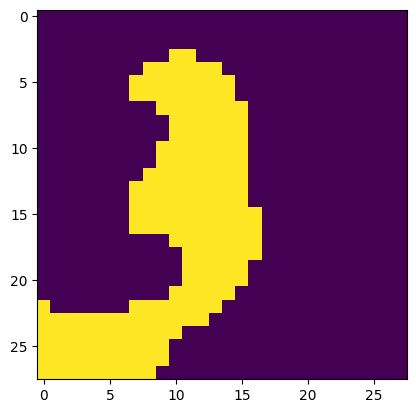

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 314
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

In [12]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)